<h1> For tensorBoad GO Down</h1>

In [25]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [26]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
len(x_train)

60000

In [27]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

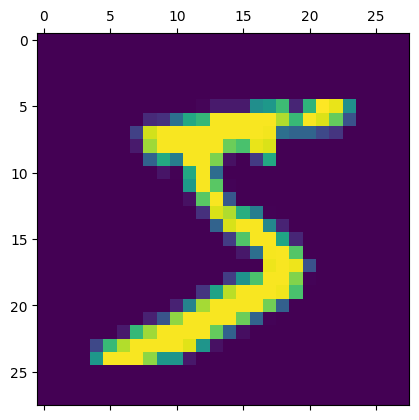

In [28]:
plt.matshow(x_train[0])

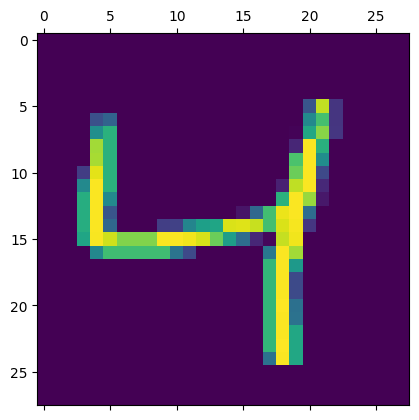

In [29]:
plt.matshow(x_train[2])

In [30]:
y_train[2]

np.uint8(4)

In [31]:
x_train.shape  #28*28 image

(60000, 28, 28)

reduce numbers to less than 1 values to improve the accuracy and scale the data


In [32]:
x_train=x_train/255
x_test=x_test/255

In [33]:
# Flatten x_test and x_train images
x_test_flat = x_test.reshape(len(x_test), 28*28)  # Reshape to (10000, 784) if x_test has 10000 images
x_train_flat = x_train.reshape(len(x_train), 28*28)

# No need to reshape y_test or y_train since they are labels
y_test_flat = y_test  # Keep the labels as they are
y_train_flat = y_train

x_test_flat.shape

(10000, 784)

In [34]:
x_train_flat[0]#single array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train_flat, y_train_flat, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8152 - loss: 0.7184
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.9137 - loss: 0.3124
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.9217 - loss: 0.2787
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.9248 - loss: 0.2707
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.9273 - loss: 0.2605


In [36]:
model.evaluate(x_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.9153 - loss: 0.3038


[0.2681911289691925, 0.9257000088691711]

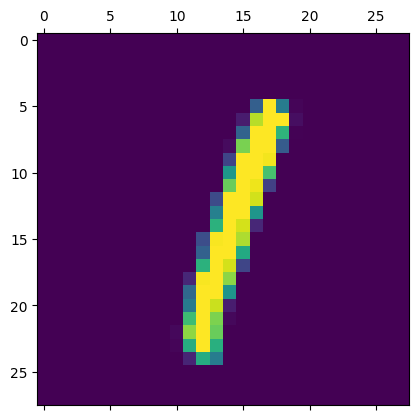

In [37]:
plt.matshow(x_test[5])

In [38]:
y_pred=model.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step


In [39]:
y_pred[5] #outputs of 10 output scores

array([6.3302679e-05, 9.9712926e-01, 4.7661933e-01, 3.9246634e-01,
       6.8202456e-03, 2.3810003e-02, 1.0079690e-02, 6.2469256e-01,
       6.0249394e-01, 1.4108630e-01], dtype=float32)

In [40]:
np.argmax(y_pred[5])

np.int64(1)

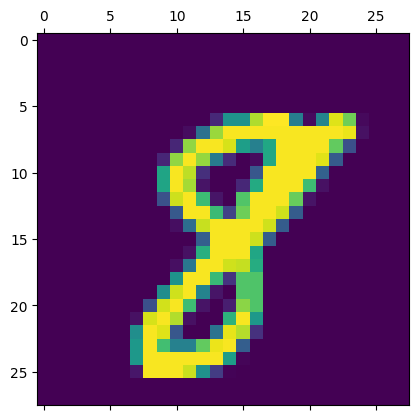

In [41]:
plt.matshow(x_train[55])

In [42]:
np.argmax(y_pred[55])#prediction went wrong

np.int64(0)

In [43]:
y_pred_labels=[int(np.argmax(i)) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [44]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    0,    1,    2,    0,    7,   12,    3,    3,    1],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   3,    9,  917,   17,    7,    4,   13,   12,   47,    3],
       [   1,    0,   19,  923,    0,   23,    2,   11,   26,    5],
       [   1,    1,    7,    1,  905,    0,   12,    6,   10,   39],
       [   7,    2,    3,   37,    6,  775,   14,    8,   34,    6],
       [   7,    3,    7,    1,    7,   11,  918,    2,    2,    0],
       [   1,    5,   22,    4,    3,    0,    0,  965,    4,   24],
       [   5,    5,    7,   17,    8,   25,    9,   13,  880,    5],
       [   8,    5,    2,    9,   21,    6,    0,   30,   13,  915]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'actual_value')

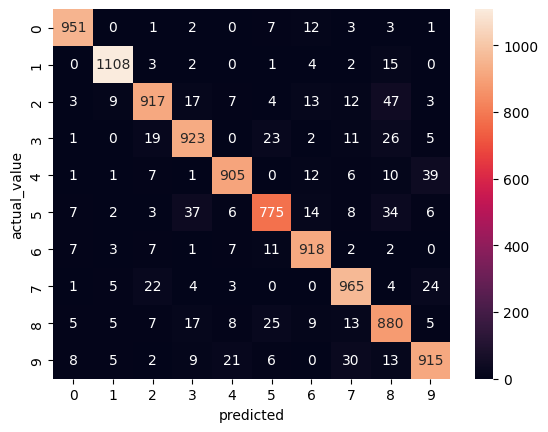

In [45]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("actual_value")

now we add a hidden layer to imporovise the performance

In [46]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model2.fit(x_train_flat, y_train_flat, epochs=5)

Epoch 1/5


c:\WAHTEVER ELSE\GEEK STUFF\python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8765 - loss: 0.4419
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9621 - loss: 0.1311
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.9742 - loss: 0.0859
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9812 - loss: 0.0642
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.9853 - loss: 0.0496


In [47]:
model2.evaluate(x_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.9696 - loss: 0.0951


[0.08423399925231934, 0.9746000170707703]

In [48]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#added
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
]) 

model2.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model2.fit(x_train,y_train, epochs=5)

Epoch 1/5


c:\WAHTEVER ELSE\GEEK STUFF\python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8744 - loss: 0.4559
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9616 - loss: 0.1293
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9746 - loss: 0.0847
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9820 - loss: 0.0600
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9852 - loss: 0.0501


<H1 color='red'>TensorBoad</h1>

In [55]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#added
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
]) 


model3.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/new",histogram_freq=1)

model3.fit(x_train,y_train, epochs=5,callbacks=[tb_callback])


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8714 - loss: 0.4608
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9613 - loss: 0.1282
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9730 - loss: 0.0901
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9817 - loss: 0.0638
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9841 - loss: 0.0533
